In [22]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from rubin_scheduler.utils import calc_season

In [93]:
for path in ["baseline", "ddf_acc_baseline", "ddf_acc_early", "ddf_accourdion", "ddf_deeper"]:

    d1 = np.load("../"+path+ "/ddf_array.npz")
    a1 = d1["obs_array"].copy()
    d1.close()

    print(path)
    for note in np.unique(a1["scheduler_note"]):
        indx = np.where(a1["scheduler_note"] == note)[0]
        ra = np.degrees(a1["RA"][indx[0]])
        season = np.floor(calc_season(ra, a1["mjd"][indx]))
    
        lengths = []
        for sea in np.unique(season):
            ins = np.where(season == sea)
            #print(note, sea, a1["mjd"][indx[ins]].max() - a1["mjd"][indx[ins]].min())
            lengths.append(a1["mjd"][indx[ins]].max() - a1["mjd"][indx[ins]].min())
        lengths = np.array(lengths)
        good = np.where(np.array(lengths) > 200)
        print(note, "%0.1f" % np.mean(lengths[good]), indx.size)
    print("-----")

baseline
DD:COSMOS 243.6 60043
DD:ECDFS 240.9 28148
DD:EDFS_a 242.5 19266
DD:EDFS_b 242.5 19266
DD:ELAISS1 241.9 28100
DD:XMM_LSS 233.9 27972
-----
ddf_acc_baseline
DD:COSMOS 243.6 60043
DD:ECDFS 298.1 28148
DD:EDFS_a 309.1 19266
DD:EDFS_b 309.1 19266
DD:ELAISS1 289.1 28100
DD:XMM_LSS 233.9 27972
-----
ddf_acc_early
DD:COSMOS 243.6 63393
DD:ECDFS 297.9 31240
DD:EDFS_a 309.1 21466
DD:EDFS_b 309.1 21466
DD:ELAISS1 289.1 31180
DD:XMM_LSS 235.0 31076
-----
ddf_accourdion
DD:COSMOS 243.6 63393
DD:ECDFS 298.1 31248
DD:EDFS_a 309.1 21466
DD:EDFS_b 309.1 21466
DD:ELAISS1 289.1 31200
DD:XMM_LSS 233.9 31072
-----
ddf_deeper
DD:COSMOS 243.6 63393
DD:ECDFS 298.1 31248
DD:EDFS_a 309.1 21466
DD:EDFS_b 309.1 21466
DD:ELAISS1 289.1 31200
DD:XMM_LSS 233.9 31072
-----


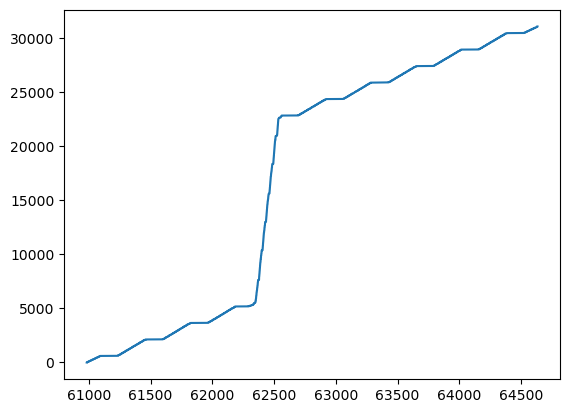

In [19]:
#indx = np.where(a1["scheduler_note"] == "DD:XMM_LSS")[0]
##mjd = np.sort(a1["mjd"][indx])
#plt.plot(mjd, np.arange(indx.size))
#plt.xlim([61000, 62000])

In [72]:
from ddf_df_gen import generate_ddf_df

In [73]:
acc_df = generate_ddf_df()

In [74]:
acc_df

,ddf_name,season,even_odd,low_season_frac,u,g,r,i,z,y,season_length,flush_length,g_depth_limit,n_sequences
0,XMM_LSS,0,None,0.0,3,0,0,0,0,0,225,2.0,23.5,33
0,XMM_LSS,0,None,0.0,0,0,0,0,0,2,225,2.0,23.5,33
0,XMM_LSS,0,even,0.0,0,2,0,2,0,0,225,0.5,22.8,56
0,XMM_LSS,0,odd,0.0,0,0,2,0,2,0,225,0.5,22.8,56
0,XMM_LSS,10,None,0.0,3,0,0,0,0,0,225,2.0,23.5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,EDFS_a,1,None,0.0,30,0,0,0,0,0,300,2.0,23.5,75
0,EDFS_a,1,None,0.0,0,0,0,0,0,40,300,2.0,23.5,75
0,EDFS_a,1,even,0.0,0,4,0,4,0,0,300,0.5,22.8,200
0,EDFS_a,1,odd,0.0,0,0,4,0,4,0,300,0.5,22.8,200


In [77]:
from baseline_ddf_df_gen import generate_ddf_df as gen_base_df

In [78]:
base_df = gen_base_df()

In [89]:
base_nf = base_df["u"] + base_df["g"] + base_df["r"] + base_df["i"] + base_df["z"] + base_df["y"]

In [90]:
acc_nf = acc_df["u"] + acc_df["g"] + acc_df["r"] + acc_df["i"] + acc_df["z"] + acc_df["y"]

In [91]:
base_nf.values - acc_nf.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -4, 0,
       0, 0, 0, -4, 0, 0, 0, 0, -4, 0, 0, 0, 0, -4, 0, 0, 0, 0, -4, 0, 0,
       0, 0, -4, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)